# Loading Packages

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
import warnings
warnings.filterwarnings("ignore")   # To ignore any warnings warnings.filterwarnings("ignore")

# Reading data

In [2]:
data=pd.read_csv("loan.csv") 


# Understanding Data

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape 

(614, 13)

In [5]:
# Print data types for each variable train.dtypes
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.drop('Loan_ID',axis=1,inplace=True)

### 1 : Identify the categorical and continuous features in the data ?

In [30]:
#print column names with nuniques and dtypes
def df_nunique_dtypes(data):
     df=pd.DataFrame(data.nunique(),columns=['n_unique_values'])
     df['dtypes']=data.dtypes
     print(df)
df_nunique_dtypes(data)     

                   n_unique_values    dtypes
Gender                           2    object
Married                          2    object
Dependents                       4    object
Education                        2    object
Self_Employed                    2    object
ApplicantIncome                505   float64
CoapplicantIncome              287   float64
LoanAmount                     203   float64
Loan_Amount_Term                10  category
Credit_History                   2  category
Property_Area                    3    object
Loan_Status                      2    object


In [26]:
#convert required columns/features into appropriate dtypes
data['ApplicantIncome']=data['ApplicantIncome'].astype('float')
data[['Loan_Amount_Term','Credit_History']]=data[['Loan_Amount_Term','Credit_History']].apply(lambda x: x.astype('category'))

In [29]:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term     category
Credit_History       category
Property_Area          object
Loan_Status            object
dtype: object

In [35]:
#print continuous features and categorical features separately
def features_list_by_dtypes(data):     
     continuous_cols=data.select_dtypes(include=['float64']).columns
     categorical_cols=data.select_dtypes(include=['object','category']).columns
     print('continuous_cols: \n{} \ncategorical_cols:\n {}'.format(continuous_cols,categorical_cols))
     return continuous_cols,categorical_cols
continuous_cols,categorical_cols=features_list_by_dtypes(data)

continuous_cols: 
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object') 
categorical_cols:
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


### 2. What kind of distribution is followed by Applicant Income ?

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

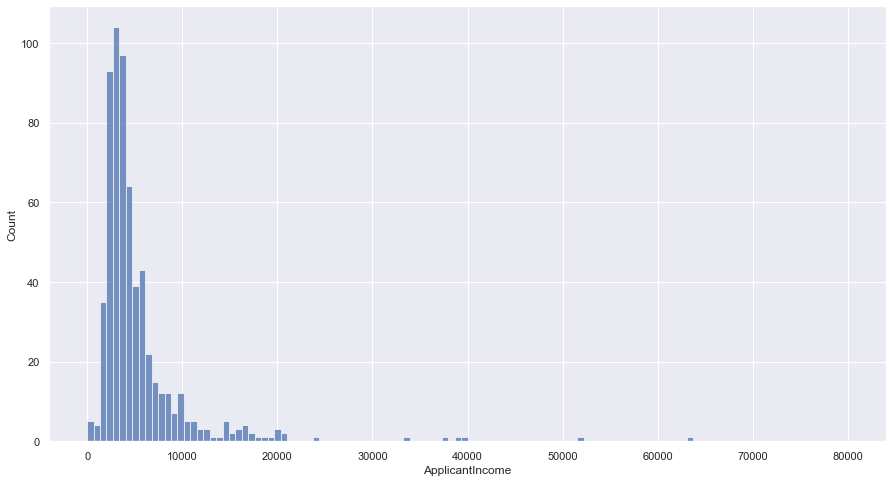

In [55]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data['ApplicantIncome'],binrange=(0,80000))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

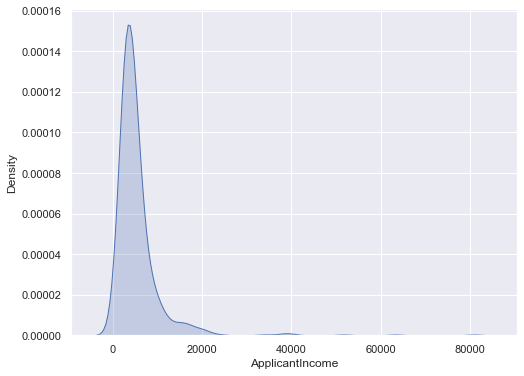

In [59]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.kdeplot(data['ApplicantIncome'],fill=True)

In [60]:
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
 Applicant Income follows right skewed distribution/positive skew distribution as there are more points towards right

### 3. What kind of distribution is followed by CoApplicant Income ?

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

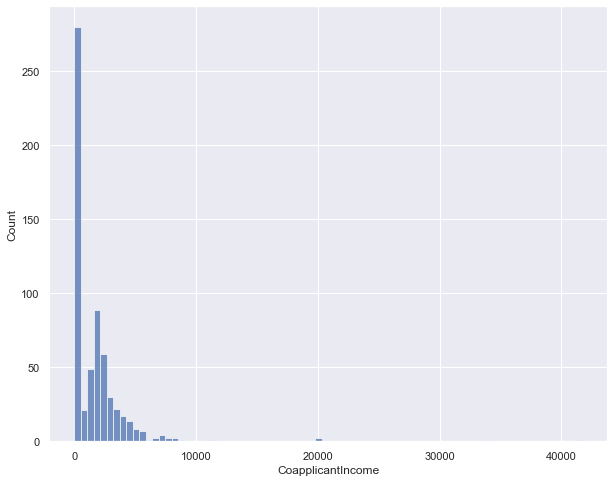

In [70]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.histplot(data['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

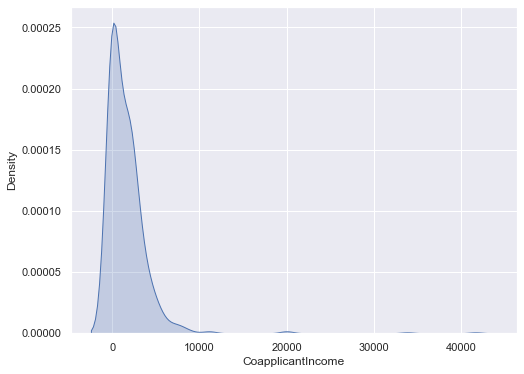

In [72]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.kdeplot(data['CoapplicantIncome'],fill=True)

More_questions to try: 

### 4. What kind of distribution is followed by LoanAmount ?

### 5. Plot KDE plot with descriptive statistics for Loan Amount ?

### 6. Observe QQ plot for Loan Amount, Applicant Income and CoApplicant Income, derive your insights from them ?